In [1]:
from skimage.io import imread
image = imread('parrots.jpg')

In [2]:
%matplotlib inline

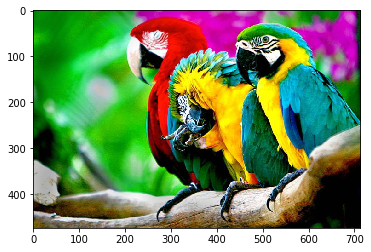

In [3]:
import pylab
pylab.imshow(image)

In [4]:
import skimage
image_f = skimage.img_as_float(image)

In [5]:
image_f

array([[[0.01568627, 0.49411765, 0.01960784],
        [0.00784314, 0.49411765, 0.00784314],
        [0.00784314, 0.49411765, 0.00784314],
        ...,
        [0.        , 0.21960784, 0.00784314],
        [0.        , 0.20784314, 0.03137255],
        [0.00784314, 0.21568627, 0.04313725]],

       [[0.01568627, 0.49411765, 0.01960784],
        [0.00784314, 0.49411765, 0.00784314],
        [0.00784314, 0.49411765, 0.00784314],
        ...,
        [0.        , 0.21176471, 0.00392157],
        [0.        , 0.20784314, 0.03137255],
        [0.        , 0.20392157, 0.03137255]],

       [[0.01176471, 0.49019608, 0.01568627],
        [0.00784314, 0.49411765, 0.00784314],
        [0.00784314, 0.49411765, 0.00784314],
        ...,
        [0.        , 0.21176471, 0.00392157],
        [0.        , 0.20392157, 0.03137255],
        [0.        , 0.2       , 0.03137255]],

       ...,

       [[0.4745098 , 0.37647059, 0.01568627],
        [0.44705882, 0.35686275, 0.        ],
        [0.45098039, 0

In [6]:
# image_f.reshape((image_f.shape[0]*image_f.shape[1], image_f.shape[2]))
image_f.shape[0]

474

In [7]:
image_f3 = image_f.reshape((image_f.shape[0]*image_f.shape[1], image_f.shape[2]))

In [8]:
image_f3.shape

(337962, 3)

In [9]:
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
import numpy as np
for clusters in range(2, 20):
    kmeans = KMeans(n_clusters=clusters, init='k-means++', random_state=241).fit(image_f3)
    tmp_img = kmeans.labels_.reshape((image_f.shape[0], image_f.shape[1]))
    img_mn = np.zeros_like(image_f)
    img_md = np.zeros_like(image_f)
    for cluster in range(clusters):
        clr_mn = np.mean(image_f[tmp_img==cluster], axis=0)
        clr_md = np.median(image_f[tmp_img==cluster], axis=0)
        img_mn[tmp_img==cluster] = np.tile(clr_mn, (img_mn[tmp_img==cluster].shape[0], 1))
        img_md[tmp_img==cluster] = np.tile(clr_md, (img_md[tmp_img==cluster].shape[0], 1))
    MSE_mn = mean_squared_error(image_f3, img_mn.reshape((img_mn.shape[0]*img_mn.shape[1], img_mn.shape[2])))
    MSE_md = mean_squared_error(image_f3, img_md.reshape((img_md.shape[0]*img_md.shape[1], img_md.shape[2])))
    PSNR_mn = ((20 * np.log10(1)) - (10 * np.log10(MSE_mn)))
    PSNR_md = ((20 * np.log10(1)) - (10 * np.log10(MSE_md)))
    print(clusters, MSE_mn, MSE_md, PSNR_mn, PSNR_md)
    if PSNR_mn > 20.:
        break
fout = open('./ans/1cluster', 'w', encoding='utf-8')
print(clusters, file=fout, end='')
fout.close()

2 0.061941838861891425 0.06835912367073642 12.080159059259834 11.652035133504077
3 0.048378172431834676 0.052622777884024335 13.153505418807338 12.788262298371658
4 0.03657786294324927 0.039784425546793005 14.367816717154312 14.00286908399912
5 0.02800844323518602 0.030320437941956786 15.52711029454094 15.182645301375551
6 0.022161635020127673 0.024827588011336887 16.543982017944746 16.050654699036667
7 0.01721481531267129 0.01846552671940629 17.64097632216815 17.336382998153784
8 0.014332456545417248 0.015357514610167808 18.436793662889656 18.13679062847908
9 0.012267097205210062 0.013135509549305285 19.112581933369835 18.815530755113873
10 0.010864809061146124 0.011443890384189512 19.639779015955753 19.414263107557666
11 0.00971102498389238 0.010364596748200844 20.127349285517795 19.844475901873906


In [10]:
import numpy as np
np.mean(image_f[tmp_img==0], axis=0)

array([0.56034885, 0.52330367, 0.42699905])

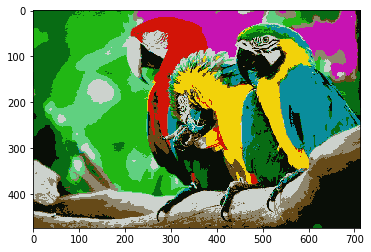

In [11]:
pylab.imshow(img_mn)

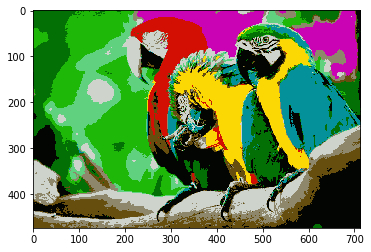

In [12]:
pylab.imshow(img_md)

In [13]:
img_my = np.zeros_like(image_f)
clr = np.mean(image_f[tmp_img==0], axis=0)
img_my[tmp_img==0] = np.tile(clr, (img_my[tmp_img==0].shape[0], 1))
img_my

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])